In [1]:
% matplotlib inline
from load_environment import *

-- Loading Data...
	- Numpy file already exists. Loading /home/ndc08/code/research/compneuro/max_planck_jupiter/nathans_project/data/ferret2152_TSeries-01292015-1540_site3_0.75ISOF_AL.npy...


#### Get time series for one pixel to apply Kalman Filter to

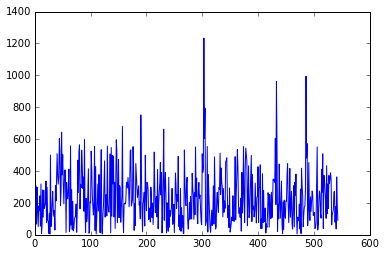

In [8]:
tSeries = data[:,200,100]; plt.plot(tSeries); plt.show()

Our model is below:

$$x_k=ax_{k-1}+w_k$$
$$z_k=x_k+v_k$$

Here, we say $x_k$ is the true signal at time step $k$ that we are interested in. The model assumes that the true value is some multiple of the previous value plus a constant. In practice $a$ depends on the system being modeled and $w_k$ is called the *process nosie*. $w_k$ represents intrinsic noise features of the process taking place. $z_k$ is our actual observation or measurement, we say it is equal to the true signal $x_k$ plus a stochastic noise term $v_k$. The noise term is by definition random and can't be found to use in calculating the true current state $x_k$, so the Kalman Filter tries to predict the current state $\hat x_k$ by using the current observation $z_k$ and the previous prediction $\hat x_{k-1}$...

$$\hat x_k = \hat x_{k-1} + g_k(z_k- \hat x_{k-1})$$

Here, the $g_k$ term is called the *Kalman gain*. This term can somehow be interpreted to represent our faith in the previous estimate $\hat x_k$. For example, if $g_k=0$ then the updated estimate $\hat x_k = \hat x_{k-1}$ which means we do not improve our current estimate with the observation. If on the other hand $g_k=1$ then $\hat x_k = z_k$ meaning we've abandoned the previous estimate and are putting all of our faith in the current observation...

So the question becomes how do we determine the gain? If we have that then we can predict the current state from the current observation and the previous state. The gain is found *indirectly* from the noise! We don't know the exact noise in each measurement but if we can find the **variance of the noise signal** then we can compute the current gain in terms of it. Let's assume the sensor we're using has published the variance of the noise in their apparatus, or that we've somehow calculated or estimated it and we're calling this constant $r$.

$$g_k = \frac{p_{k-1}}{p_{k-1}+r}$$

where $p_k$ is a *prediction error* that is computed recursively

$$p_k = (1-g_k)p_{k-1}$$

What does this mean? Well, if the previous prediction $x_{k-1}$ was exactly correct, then the previous prediction error $p_{k-1}$ would be zero. This means the current gain $g_k = \frac{0}{0+r}=0$ and as we discussed before we would be putting all of our faith in our previous estimation and ignoring the current observation. The opposite applies if the previous estimate were completely wrong. Then the prediction error $p_{k-1}$ would be 1 in which case $g_k = \frac{1}{1+r}\approx 1$ assuming $r$ is small and the update will consider only at the observation $z_k$ and ignore the previous estimation $\hat x_{k-1}$. 

So now we have our **prediction** of what the state *should* be...

$$\hat x_k = a \hat x_{k-1} + w_k$$
$$p_k = ap_{k-1}a$$

and our **correction** of this prediction based on an observation...

$$\hat g_k = \frac{p_k}{p_k+r}$$
$$\hat x_k = \hat x_{k} + g_k(z_k- \hat x_{k})$$
$$p_k = (1-g_k)p_k$$

####Let's try and apply this Linear Kalman Filter to the signal above... (fingers crossed)
First lets zoom in on a spike and see what happens when we apply our filter...

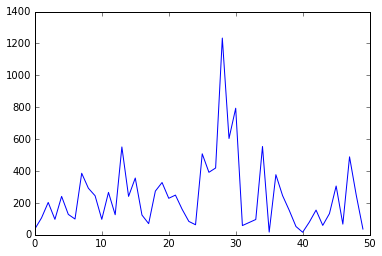

In [11]:
testSignal = tSeries[275:325]; plt.plot(testSignal); plt.show()